In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
stock_return = pd.read_csv('./Return.csv',index_col = 0)

<AxesSubplot:ylabel='Density'>

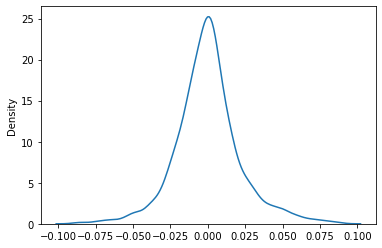

In [5]:
sns.kdeplot(returns)

<AxesSubplot:ylabel='Density'>

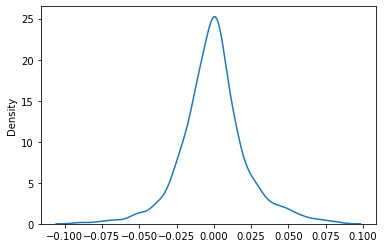

In [72]:
sns.kdeplot(np.log(1+returns))

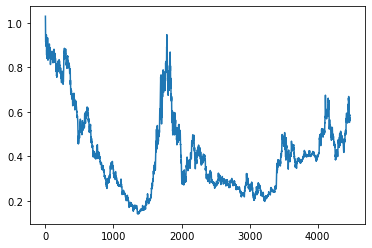

In [6]:
plt.plot((1+returns).cumprod())
price = (1+returns).cumprod()

In [3]:
close = pd.read_csv('../data_us/close.csv',index_col = 0)

In [4]:
adjusted_close = pd.read_csv('../data_us/close.csv',index_col= 0 )

In [5]:
universe = pd.read_csv('../data_us/univ_h.csv',index_col = 0)

In [6]:
universe.index = universe.index.map(lambda x: str(x)+'0101')

In [7]:
universe.index = pd.to_datetime(universe.index)
adjusted_close.index = pd.to_datetime(adjusted_close.index.map(lambda x:str(x)))

In [8]:
adjusted_close = adjusted_close.loc['2003':'2022']
universe = universe.resample('D').last().ffill().loc[adjusted_close.index]

In [9]:
stock_list = adjusted_close.columns.intersection(universe.columns)

In [10]:
adjusted_close = adjusted_close[stock_list]*universe[stock_list]


In [11]:
close = adjusted_close.dropna(axis = 0,how = 'all')

In [12]:
close = close.fillna(method = 'ffill').fillna(method = 'bfill')

In [13]:
returns = (close-close.shift(1))/close.shift(1)
returns = returns.fillna(method = 'ffill').fillna(method = 'bfill')

In [14]:
returns = returns[~np.isnan(returns)]
returns = returns[~(np.abs(returns)>=0.9)]

In [15]:
log_returns = np.log(1+returns)

In [16]:
log_returns = log_returns[~(np.abs(log_returns)>=10)]

In [17]:
data_temp = returns.values.reshape(-1)

In [18]:
data_temp = data_temp[~np.isnan(data_temp)]
condition = (data_temp>0) & (np.abs(data_temp)<0.1)
data_temp = data_temp[condition]

In [23]:
log_returns = log_returns.fillna(0)
returns = returns.fillna(0)

In [183]:
example_data = returns['0202445Q']

In [184]:
example_data = (example_data- example_data.mean())/example_data.std()

<AxesSubplot:xlabel='0202445Q', ylabel='Density'>

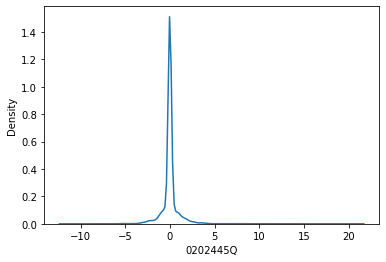

In [167]:
sns.kdeplot(example_data)

In [185]:
data_temp2 = example_data.values.reshape(-1)

In [186]:
data_temp2 = data_temp2[~np.isnan(data_temp2)]
condition = (data_temp2>0) & (np.abs(data_temp2)<5)
data_temp2 = data_temp2[condition]

<AxesSubplot:ylabel='Density'>

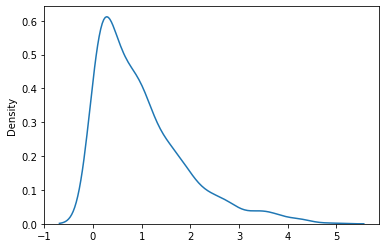

In [170]:
sns.kdeplot(data_temp2)

In [87]:
def ecdf(x):
    xs = np.sort(x)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys

In [147]:
NUM_BINS = 100

In [200]:
hist = np.histogram(data_temp2,bins=np.linspace(0,3,NUM_BINS),density=True)

IndexError: tuple index out of range

[ 0.11779459 -0.67256651  1.30449372 -0.33191448]


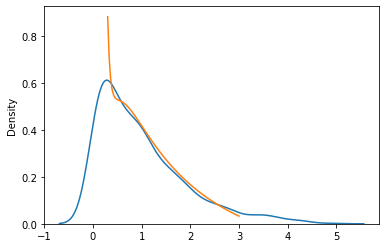

In [224]:
sns.kdeplot(data_temp2)
x = hist[1][10:]
ss = np.polyfit(x**-1,hist[0][9:],3)
print(ss)
st = np.vstack([x**-3,x**-2,x**-1,np.ones(len(x))])
plt.plot(x,np.einsum('i,ij->j',ss,st))

[0.09839388 0.17216222]


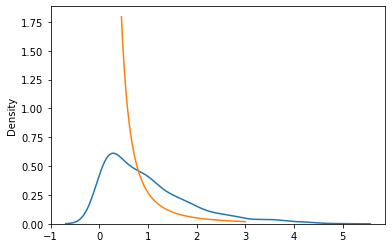

In [218]:
sns.kdeplot(data_temp2)
x = hist[1][15:]
ss = np.polyfit(x**-3,hist[0][14:],1)
print(ss)
st = np.vstack([x**-3])
plt.plot(x,np.einsum('i,ij->j',ss,st))

[-9.46346123e-05  1.71923822e-02 -3.49259485e-01  1.97120048e+00]


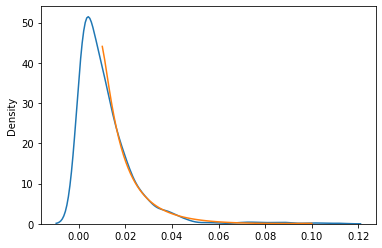

In [236]:



example_data = returns['0202445Q']
#example_data = (example_data- example_data.mean())/example_data.std()
data_temp2 = example_data.values.reshape(-1)
data_temp2 = data_temp2[~np.isnan(data_temp2)]
condition = (data_temp2>0) & (np.abs(data_temp2)<0.2)
data_temp2 = data_temp2[condition]
#sns.kdeplot(data_temp2)
hist = np.histogram(data_temp2,bins=np.linspace(0,0.1,NUM_BINS),density=True)
#plt.plot(hist[0])
sns.kdeplot(data_temp2)
x = hist[1][10:]
ss = np.polyfit(x**-1,hist[0][9:],3)
print(ss)
st = np.vstack([x**-3,x**-2,x**-1,np.ones(len(x))])
plt.plot(x,np.einsum('i,ij->j',ss,st))

[ 0.11420715 -0.64546578  1.2669232  -0.31994452]


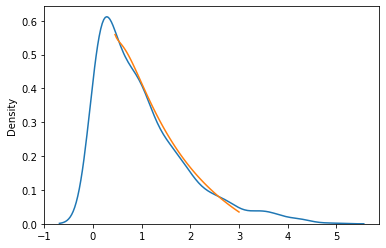

In [240]:



example_data = returns['0202445Q']
example_data = (example_data- example_data.mean())/example_data.std()
data_temp2 = example_data.values.reshape(-1)
data_temp2 = data_temp2[~np.isnan(data_temp2)]
condition = (data_temp2>0) & (np.abs(data_temp2)<5)
data_temp2 = data_temp2[condition]
#sns.kdeplot(data_temp2)
hist = np.histogram(data_temp2,bins=np.linspace(0,3,NUM_BINS),density=True)
#plt.plot(hist[0])
sns.kdeplot(data_temp2)
x = hist[1][15:]
ss = np.polyfit(x**-1,hist[0][14:],3)
print(ss)
st = np.vstack([x**-3,x**-2,x**-1,np.ones(len(x))])
plt.plot(x,np.einsum('i,ij->j',ss,st))

[ 0.12151283 -0.68815856  1.32201909 -0.33461588]


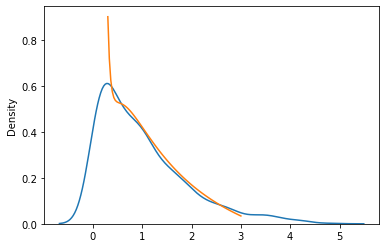

In [242]:



example_data = log_returns['0202445Q']
example_data = (example_data- example_data.mean())/example_data.std()
data_temp2 = example_data.values.reshape(-1)
data_temp2 = data_temp2[~np.isnan(data_temp2)]
condition = (data_temp2>0) & (np.abs(data_temp2)<5)
data_temp2 = data_temp2[condition]
#sns.kdeplot(data_temp2)
hist = np.histogram(data_temp2,bins=np.linspace(0,3,NUM_BINS),density=True)
#plt.plot(hist[0])
sns.kdeplot(data_temp2)
x = hist[1][10:]
ss = np.polyfit(x**-1,hist[0][9:],3)
print(ss)
st = np.vstack([x**-3,x**-2,x**-1,np.ones(len(x))])
plt.plot(x,np.einsum('i,ij->j',ss,st))

[-9.49651433e-05  1.74037085e-02 -3.63863410e-01  2.13215339e+00]


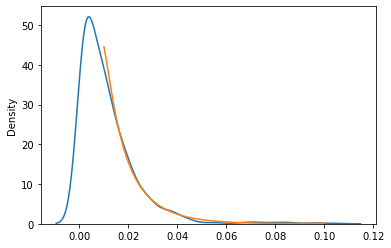

In [243]:



example_data = log_returns['0202445Q']
#example_data = (example_data- example_data.mean())/example_data.std()
data_temp2 = example_data.values.reshape(-1)
data_temp2 = data_temp2[~np.isnan(data_temp2)]
condition = (data_temp2>0) & (np.abs(data_temp2)<0.2)
data_temp2 = data_temp2[condition]
#sns.kdeplot(data_temp2)
hist = np.histogram(data_temp2,bins=np.linspace(0,0.1,NUM_BINS),density=True)
#plt.plot(hist[0])
sns.kdeplot(data_temp2)
x = hist[1][10:]
ss = np.polyfit(x**-1,hist[0][9:],3)
print(ss)
st = np.vstack([x**-3,x**-2,x**-1,np.ones(len(x))])
plt.plot(x,np.einsum('i,ij->j',ss,st))

In [520]:
example_data = log_returns['0202445Q']
example_data = (example_data- example_data.mean())/example_data.std()

data_temp2 = example_data[~np.isnan(example_data)]
condition = (np.abs(data_temp2)<5)
data_temp2 = data_temp2[condition]

In [521]:
factor1 = data_temp2.rolling(window = 3).mean()
factor2 = data_temp2.rolling(window = 5).mean()
factor3 = data_temp2.rolling(window = 10).mean()
factor4 = data_temp2.rolling(window = 20).mean()
factor5 = data_temp2.rolling(window = 50).mean()


factor6 = data_temp2-data_temp2.shift(3)
factor7 = data_temp2-data_temp2.shift(5)
factor8 = data_temp2-data_temp2.shift(10)
factor9 = data_temp2-data_temp2.shift(20)
factor10 = data_temp2-data_temp2.shift(50)

In [268]:
factor_list = [factor1,factor2,factor3,factor4,factor5,\
               factor6,factor7,factor8,factor9,factor10]

In [275]:
    dat = factor_list[9].copy()
    dat = dat[50:]
    dat[dat>0] = 1
    dat[dat<0] = -1

In [276]:
dat

Date
2003-03-18    1.0
2003-03-19   -1.0
2003-03-20   -1.0
2003-03-21    1.0
2003-03-24   -1.0
             ... 
2022-12-23    0.0
2022-12-27    0.0
2022-12-28    0.0
2022-12-29    0.0
2022-12-30    0.0
Name: 0202445Q, Length: 4956, dtype: float64

In [292]:
turnover = pd.read_csv('../data_us/dv.csv',index_col = 0)

In [288]:
volume = turnover/close

In [307]:
example_data_volume = volume['0202445Q']
example_data_volume = (example_data_volume- example_data_volume.mean())/example_data_volume.std()

data_temp3 = example_data_volume[~np.isnan(example_data_volume)]
condition = (np.abs(data_temp3)<5)
data_temp3 = data_temp3[condition]

In [308]:
data_temp3 = (data_temp3-data_temp3.min())/(data_temp3.max()-data_temp3.min())

In [293]:
turnover = turnover.loc['2003':'2022']
turnover.index = pd.to_datetime(turnover.index.map(lambda x:str(x)))

In [294]:
turnover = turnover[stock_list]*universe[stock_list]
turnover = turnover.dropna(axis = 0,how = 'all')
turnover = turnover.fillna(method = 'ffill').fillna(method = 'bfill')

In [296]:
volume = turnover/close

In [456]:
CONSTANT = 0.1
return_list = []
for i in range(10):
    dat = factor_list[i]
    dat = dat[50:]
    dat[dat>0] = 1
    dat[dat<0] = -1
    close1 = data_temp_close[50:] + dat*data_temp3[50:]*CONSTANT
    
    close1 = close1.fillna(method = 'ffill').fillna(method = 'bfill')
    return1 = (close1-close1.shift(1))/close1.shift(1)
    return1 = return1.fillna(method = 'ffill').fillna(method = 'bfill')
    
    #return1 = return1.fillna(method = 'ffill').fillna(method = 'bfill')
    
    return_list.append(return1)

In [458]:
CONSTANT = 0.1
return_list = []
for i in range(10):
    dat = factor_list[i]
    dat = dat[50:]
    dat[dat>0] = 1
    dat[dat<0] = -1
    close1 = data_temp_close[50:] + dat*data_temp3[50:]*CONSTANT
    
    close1 = close1.fillna(method = 'ffill').fillna(method = 'bfill')
    return1 = (close1-close1.shift(1))/close1.shift(1)
    return1 = return1.fillna(method = 'ffill').fillna(method = 'bfill')
    
    #return1 = return1.fillna(method = 'ffill').fillna(method = 'bfill')
    
    return_list.append(return1)

In [300]:
data_temp3

Date
2003-01-02   -1.324823
2003-01-03   -1.305382
2003-01-06   -1.218638
2003-01-07   -1.309710
2003-01-08   -1.405317
                ...   
2021-12-27    0.743778
2021-12-28    0.743778
2021-12-29    0.743778
2021-12-30    0.743778
2021-12-31    0.743778
Name: 0202445Q, Length: 4781, dtype: float64

[-8.18752769e-05  1.54477100e-02 -2.89826894e-01  1.39243417e+00]


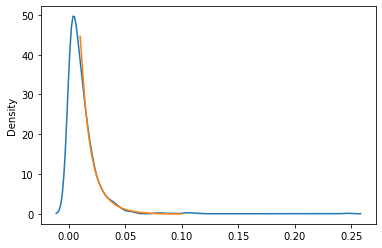

In [470]:



example_data = return_list[3]

example_data = example_data[~np.isnan(example_data)]
condition = (np.abs(example_data)<1)
example_data = example_data[condition]

#example_data = (example_data- example_data.mean())/example_data.std()
data_temp2 = example_data.values.reshape(-1)
data_temp2 = data_temp2[~np.isnan(data_temp2)]
condition = (data_temp2>0) & (np.abs(data_temp2)<0.3)
data_temp2 = data_temp2[condition]
#sns.kdeplot(data_temp2)
hist = np.histogram(data_temp2,bins=np.linspace(0,0.1,NUM_BINS),density=True)
#plt.plot(hist[0])
sns.kdeplot(data_temp2)
x = hist[1][10:]
ss = np.polyfit(x**-1,hist[0][9:],3)
print(ss)
st = np.vstack([x**-3,x**-2,x**-1,np.ones(len(x))])
plt.plot(x,np.einsum('i,ij->j',ss,st))

[-0.84892722  1.74651794 -0.50223789  0.06730457]


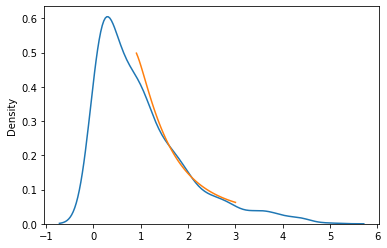

In [466]:



example_data = return_list[3]

example_data = example_data[~np.isnan(example_data)]
condition = (np.abs(example_data)<1)
example_data = example_data[condition]

example_data = (example_data- example_data.mean())/example_data.std()
data_temp2 = example_data.values.reshape(-1)
data_temp2 = data_temp2[~np.isnan(data_temp2)]
condition = (data_temp2>0) & (np.abs(data_temp2)<5)
data_temp2 = data_temp2[condition]
#sns.kdeplot(data_temp2)
hist = np.histogram(data_temp2,bins=np.linspace(0,3,NUM_BINS),density=True)
#plt.plot(hist[0])
sns.kdeplot(data_temp2)
x = hist[1][30:]
ss = np.polyfit(x**-1,hist[0][29:],3)
print(ss)
st = np.vstack([x**-3,x**-2,x**-1,np.ones(len(x))])
plt.plot(x,np.einsum('i,ij->j',ss,st))

In [473]:
example_data = return_list[0]

example_data = example_data[~np.isnan(example_data)]
condition = (np.abs(example_data)<1)
example_data = example_data[condition]

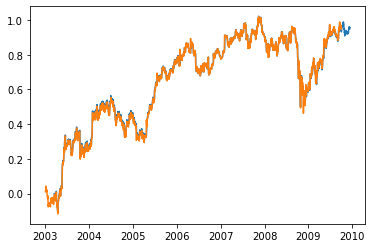

In [484]:
plt.plot(example_data[:1700].cumsum())
plt.plot(returns['0202445Q'][:1700].cumsum())

In [491]:
CONSTANT =20
return_list = []
for i in range(10):
    dat = factor_list[i]
    dat = dat[50:]
    dat[dat>0] = 1
    dat[dat<0] = -1
    close1 = data_temp_close[50:] + dat*data_temp3[50:]*CONSTANT
    
    close1 = close1.fillna(method = 'ffill').fillna(method = 'bfill')
    return1 = (close1-close1.shift(1))/close1.shift(1)
    return1 = return1.fillna(method = 'ffill').fillna(method = 'bfill')
    
    #return1 = return1.fillna(method = 'ffill').fillna(method = 'bfill')
    
    return_list.append(return1)

[-7.83117619e-05  1.30264829e-02 -1.20859247e-01  7.94256250e-01]


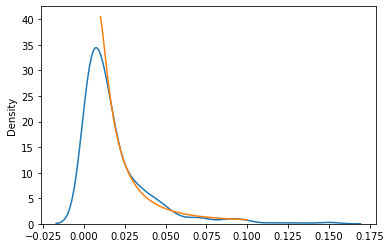

In [492]:



example_data = return_list[3]

example_data = example_data[~np.isnan(example_data)]
condition = (np.abs(example_data)<1)
example_data = example_data[condition]

#example_data = (example_data- example_data.mean())/example_data.std()
data_temp2 = example_data.values.reshape(-1)
data_temp2 = data_temp2[~np.isnan(data_temp2)]
condition = (data_temp2>0) & (np.abs(data_temp2)<0.3)
data_temp2 = data_temp2[condition]
#sns.kdeplot(data_temp2)
hist = np.histogram(data_temp2,bins=np.linspace(0,0.1,NUM_BINS),density=True)
#plt.plot(hist[0])
sns.kdeplot(data_temp2)
x = hist[1][10:]
ss = np.polyfit(x**-1,hist[0][9:],3)
print(ss)
st = np.vstack([x**-3,x**-2,x**-1,np.ones(len(x))])
plt.plot(x,np.einsum('i,ij->j',ss,st))

In [493]:
example_data = return_list[3]

example_data = example_data[~np.isnan(example_data)]
condition = (np.abs(example_data)<1)
example_data = example_data[condition]

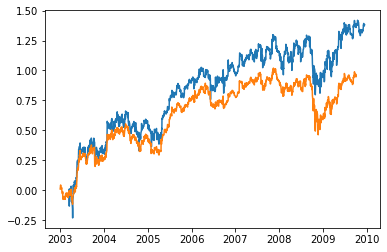

In [494]:
plt.plot(example_data[:1700].cumsum())
plt.plot(returns['0202445Q'][:1700].cumsum())

In [ ]:
FE5107 FE5214

In [495]:
CONSTANT = 0.1
return_list = []
for i in range(10):
    dat = factor_list[i]
    dat = dat[50:]
    dat[dat>0] = 1
    dat[dat<0] = -1
    close1 = data_temp_close[50:] + dat*data_temp3[50:]*CONSTANT
    
    close1 = close1.fillna(method = 'ffill').fillna(method = 'bfill')
    return1 = (close1-close1.shift(1))/close1.shift(1)
    return1 = return1.fillna(method = 'ffill').fillna(method = 'bfill')
    
    #return1 = return1.fillna(method = 'ffill').fillna(method = 'bfill')
    
    return_list.append(return1)

In [508]:
data_temp_close

Date
2003-01-02     34.74
2003-01-03     35.09
2003-01-06     35.90
2003-01-07     35.50
2003-01-08     34.79
               ...  
2022-12-23    106.95
2022-12-27    106.95
2022-12-28    106.95
2022-12-29    106.95
2022-12-30    106.95
Name: 0202445Q, Length: 5035, dtype: float64

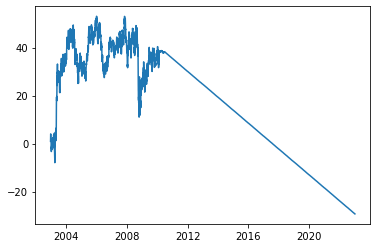

[ 0.12151283 -0.68815856  1.32201909 -0.33461588]


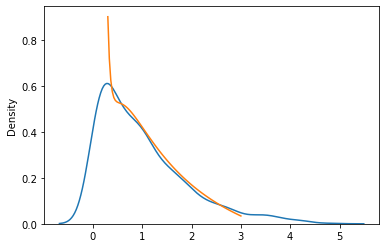

In [510]:
example_data = log_returns['0202445Q']
example_data = (example_data- example_data.mean())/example_data.std()
data_temp2 = example_data.values.reshape(-1)
data_temp2 = data_temp2[~np.isnan(data_temp2)]
condition = (data_temp2>0) & (np.abs(data_temp2)<5)
data_temp2 = data_temp2[condition]
#sns.kdeplot(data_temp2)
hist = np.histogram(data_temp2,bins=np.linspace(0,3,NUM_BINS),density=True)
#plt.plot(hist[0])
sns.kdeplot(data_temp2)
x = hist[1][10:]
ss = np.polyfit(x**-1,hist[0][9:],3)
print(ss)
st = np.vstack([x**-3,x**-2,x**-1,np.ones(len(x))])
plt.plot(x,np.einsum('i,ij->j',ss,st))

[-9.49651433e-05  1.74037085e-02 -3.63863410e-01  2.13215339e+00]


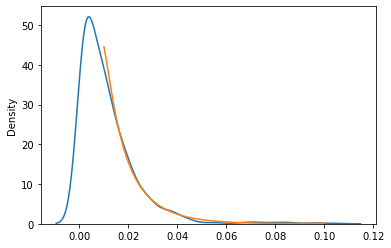

In [511]:



example_data = log_returns['0202445Q']
#example_data = (example_data- example_data.mean())/example_data.std()
data_temp2 = example_data.values.reshape(-1)
data_temp2 = data_temp2[~np.isnan(data_temp2)]
condition = (data_temp2>0) & (np.abs(data_temp2)<0.2)
data_temp2 = data_temp2[condition]
#sns.kdeplot(data_temp2)
hist = np.histogram(data_temp2,bins=np.linspace(0,0.1,NUM_BINS),density=True)
#plt.plot(hist[0])
sns.kdeplot(data_temp2)
x = hist[1][10:]
ss = np.polyfit(x**-1,hist[0][9:],3)
print(ss)
st = np.vstack([x**-3,x**-2,x**-1,np.ones(len(x))])
plt.plot(x,np.einsum('i,ij->j',ss,st))

In [515]:

example_data = log_returns['0202445Q']

In [ ]:



CONSTANT = 0.1
return_list = []
for i in range(10):
    dat = factor_list[i]
    dat = dat[50:]
    dat[dat>0] = 1
    dat[dat<0] = -1
    
    for indexs in 
    
    close1 = data_temp_close[50:] + dat*data_temp3[50:]*CONSTANT
    
    close1 = close1.fillna(method = 'ffill').fillna(method = 'bfill')
    return1 = (close1-close1.shift(1))/close1.shift(1)
    return1 = return1.fillna(method = 'ffill').fillna(method = 'bfill')
    
    #return1 = return1.fillna(method = 'ffill').fillna(method = 'bfill')
    
    return_list.append(return1)

In [516]:
data_temp_close

Date
2003-01-02     34.74
2003-01-03     35.09
2003-01-06     35.90
2003-01-07     35.50
2003-01-08     34.79
               ...  
2022-12-23    106.95
2022-12-27    106.95
2022-12-28    106.95
2022-12-29    106.95
2022-12-30    106.95
Name: 0202445Q, Length: 5035, dtype: float64

In [517]:
dat

Date
2003-03-18    1.0
2003-03-19   -1.0
2003-03-20   -1.0
2003-03-21    1.0
2003-03-24   -1.0
             ... 
2022-12-23    0.0
2022-12-27    0.0
2022-12-28    0.0
2022-12-29    0.0
2022-12-30    0.0
Name: 0202445Q, Length: 4956, dtype: float64

In [528]:
data_temp4 = data_temp2[:1800]

In [529]:
factor1 = data_temp4.rolling(window = 3).mean()
factor2 = data_temp4.rolling(window = 5).mean()
factor3 = data_temp4.rolling(window = 10).mean()
factor4 = data_temp4.rolling(window = 20).mean()
factor5 = data_temp4.rolling(window = 50).mean()


factor6 = data_temp4-data_temp4.shift(3)
factor7 = data_temp4-data_temp4.shift(5)
factor8 = data_temp4-data_temp4.shift(10)
factor9 = data_temp4-data_temp4.shift(20)
factor10 = data_temp4-data_temp4.shift(50)

In [531]:
factor10

Date
2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
                ...   
2010-04-01    1.079053
2010-04-05    0.913678
2010-04-06   -0.469843
2010-04-07    0.254503
2010-04-08    2.216507
Name: 0202445Q, Length: 1800, dtype: float64

In [532]:
factor_list = [factor1,factor2,factor3,factor4,factor5,\
               factor6,factor7,factor8,factor9,factor10]

In [537]:
return_list = []
for i in factor_list:
    i[i>0] =1
    i[i<0] = -1
    j = i[50:]
    return_list.append(j)
return_lists = np.vstack([i for i in return_list])

In [543]:
daily_return = return_lists.mean(axis = 0)

In [560]:
CONSTANT = 1
start_close = data_temp_close[50]
price = start_close
result_seq = np.zeros(1750)
for date in range(1800-50):
    price = price + CONSTANT*daily_return[date]
    result_seq[date] = price
    

In [533]:
data_temp_close[50]

33.46

In [535]:
return_list

[Date
 2003-03-18    1.0
 2003-03-19   -1.0
 2003-03-20   -1.0
 2003-03-21   -1.0
 2003-03-24   -1.0
              ... 
 2010-04-01    1.0
 2010-04-05    1.0
 2010-04-06    1.0
 2010-04-07   -1.0
 2010-04-08    1.0
 Name: 0202445Q, Length: 1750, dtype: float64,
 Date
 2003-03-18    1.0
 2003-03-19    1.0
 2003-03-20    1.0
 2003-03-21    1.0
 2003-03-24   -1.0
              ... 
 2010-04-01    1.0
 2010-04-05    1.0
 2010-04-06    1.0
 2010-04-07    1.0
 2010-04-08    1.0
 Name: 0202445Q, Length: 1750, dtype: float64,
 Date
 2003-03-18    1.0
 2003-03-19    1.0
 2003-03-20    1.0
 2003-03-21    1.0
 2003-03-24    1.0
              ... 
 2010-04-01    1.0
 2010-04-05    1.0
 2010-04-06    1.0
 2010-04-07    1.0
 2010-04-08    1.0
 Name: 0202445Q, Length: 1750, dtype: float64,
 Date
 2003-03-18    1.0
 2003-03-19   -1.0
 2003-03-20    1.0
 2003-03-21    1.0
 2003-03-24    1.0
              ... 
 2010-04-01    1.0
 2010-04-05    1.0
 2010-04-06    1.0
 2010-04-07    1.0
 2010-04-08    1.0

In [561]:
resuotl_seq = pd.Series(result_seq,index = data_temp_close.index[50:1800])

In [562]:
close1 = resuotl_seq.fillna(method = 'ffill').fillna(method = 'bfill')
return1 = (close1-close1.shift(1))/close1.shift(1)
return1 = return1.fillna(method = 'ffill').fillna(method = 'bfill')

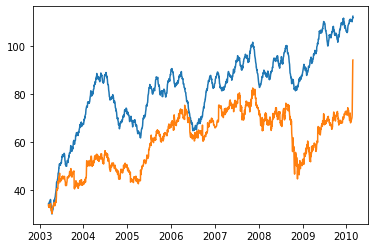

In [563]:
plt.plot(resuotl_seq)
plt.plot(data_temp_close[50:1800])

[-3.60602589  7.71436518 -3.99069735  0.60644576]


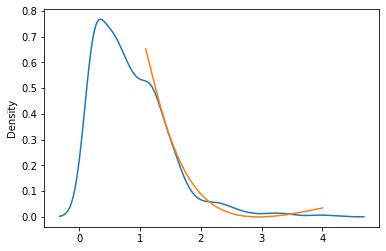

In [571]:
example_data = return1
example_data = (example_data- example_data.mean())/example_data.std()
data_temp2 = example_data.values.reshape(-1)
data_temp2 = data_temp2[~np.isnan(data_temp2)]
condition = (data_temp2>0) & (np.abs(data_temp2)<5)
data_temp2 = data_temp2[condition]
#sns.kdeplot(data_temp2)
hist = np.histogram(data_temp2,bins=np.linspace(0,4,NUM_BINS),density=True)
#plt.plot(hist[0])
sns.kdeplot(data_temp2)
x = hist[1][27:]
ss = np.polyfit(x**-1,hist[0][26:],3)
print(ss)
st = np.vstack([x**-3,x**-2,x**-1,np.ones(len(x))])
plt.plot(x,np.einsum('i,ij->j',ss,st))

[-4.03560782e-05  1.33625040e-02 -4.86885095e-01  3.95346130e+00]


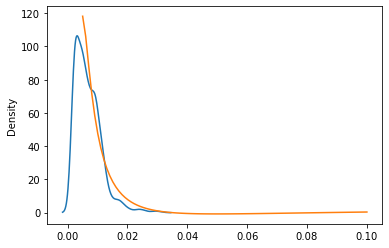

In [573]:



example_data = return1
#example_data = (example_data- example_data.mean())/example_data.std()
data_temp2 = example_data.values.reshape(-1)
data_temp2 = data_temp2[~np.isnan(data_temp2)]
condition = (data_temp2>0) & (np.abs(data_temp2)<0.2)
data_temp2 = data_temp2[condition]
#sns.kdeplot(data_temp2)
hist = np.histogram(data_temp2,bins=np.linspace(0,0.1,NUM_BINS),density=True)
#plt.plot(hist[0])
sns.kdeplot(data_temp2)
x = hist[1][5:]
ss = np.polyfit(x**-1,hist[0][4:],3)
print(ss)
st = np.vstack([x**-3,x**-2,x**-1,np.ones(len(x))])
plt.plot(x,np.einsum('i,ij->j',ss,st))

In [559]:
return1

Date
2003-03-17   -0.001789
2003-03-18   -0.001789
2003-03-19    0.000000
2003-03-20    0.002389
2003-03-21   -0.001788
                ...   
2010-02-19    0.001946
2010-02-22    0.000971
2010-02-23    0.001455
2010-02-24   -0.000484
2010-02-25    0.001696
Length: 1750, dtype: float64

In [ ]:
CONSTANT = 1
start_close = data_temp_close[50]
price = start_close
result_seq = np.zeros(1750)
for date in range(1800-50):
    price = price + CONSTANT*daily_return[date]
    result_seq[date] = price
    

In [574]:
result_seq

array([ 34.26,  33.66,  33.66, ..., 111.76, 111.56, 112.26])

In [593]:
daily_return = return_lists[:4].mean(axis = 0)

In [594]:
CONSTANT = 1
start_close = data_temp_close[50]
price = start_close
result_seq = np.zeros(1750)
for date in range(1800-50):
    price = price + CONSTANT*daily_return[date]
    result_seq[date] = price
    

In [595]:
resuotl_seq = pd.Series(result_seq,index = data_temp_close.index[50:1800])

In [596]:
close1 = resuotl_seq.fillna(method = 'ffill').fillna(method = 'bfill')
return1 = (close1-close1.shift(1))/close1.shift(1)
return1 = return1.fillna(method = 'ffill').fillna(method = 'bfill')

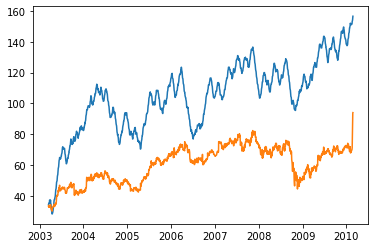

In [597]:
plt.plot(resuotl_seq)
plt.plot(data_temp_close[50:1800])

[-4.22782137e-05  1.50182724e-02 -5.07984219e-01  3.72573824e+00]


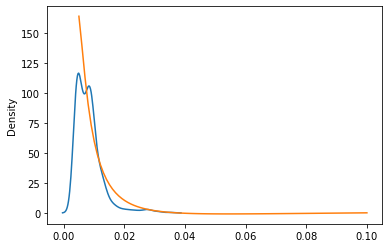

In [598]:



example_data = return1
#example_data = (example_data- example_data.mean())/example_data.std()
data_temp2 = example_data.values.reshape(-1)
data_temp2 = data_temp2[~np.isnan(data_temp2)]
condition = (data_temp2>0) & (np.abs(data_temp2)<0.2)
data_temp2 = data_temp2[condition]
#sns.kdeplot(data_temp2)
hist = np.histogram(data_temp2,bins=np.linspace(0,0.1,NUM_BINS),density=True)
#plt.plot(hist[0])
sns.kdeplot(data_temp2)
x = hist[1][5:]
ss = np.polyfit(x**-1,hist[0][4:],3)
print(ss)
st = np.vstack([x**-3,x**-2,x**-1,np.ones(len(x))])
plt.plot(x,np.einsum('i,ij->j',ss,st))

[ 1.30048323 -0.29931054 -0.15868588  0.05228592]


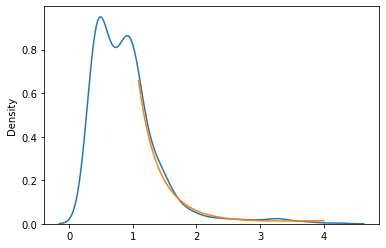

In [599]:
example_data = return1
example_data = (example_data- example_data.mean())/example_data.std()
data_temp2 = example_data.values.reshape(-1)
data_temp2 = data_temp2[~np.isnan(data_temp2)]
condition = (data_temp2>0) & (np.abs(data_temp2)<5)
data_temp2 = data_temp2[condition]
#sns.kdeplot(data_temp2)
hist = np.histogram(data_temp2,bins=np.linspace(0,4,NUM_BINS),density=True)
#plt.plot(hist[0])
sns.kdeplot(data_temp2)
x = hist[1][27:]
ss = np.polyfit(x**-1,hist[0][26:],3)
print(ss)
st = np.vstack([x**-3,x**-2,x**-1,np.ones(len(x))])
plt.plot(x,np.einsum('i,ij->j',ss,st))

In [583]:
daily_return = return_lists[5:].mean(axis = 0)

In [587]:
CONSTANT = 2
start_close = data_temp_close[50]
price = start_close
result_seq = np.zeros(1750)
for date in range(1800-50):
    price = price + CONSTANT*daily_return[date]
    result_seq[date] = price
    

In [588]:
resuotl_seq = pd.Series(result_seq,index = data_temp_close.index[50:1800])
close1 = resuotl_seq.fillna(method = 'ffill').fillna(method = 'bfill')
return1 = (close1-close1.shift(1))/close1.shift(1)
return1 = return1.fillna(method = 'ffill').fillna(method = 'bfill')

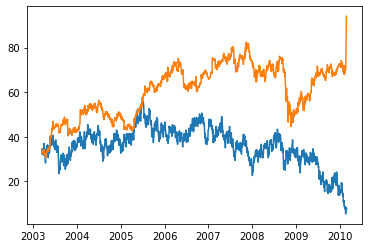

In [589]:
plt.plot(resuotl_seq)
plt.plot(data_temp_close[50:1800])

[-3.41406361  7.97406279 -4.34251     0.67689797]


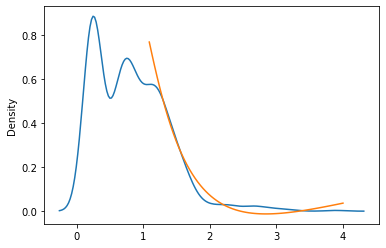

In [590]:
example_data = return1
example_data = (example_data- example_data.mean())/example_data.std()
data_temp2 = example_data.values.reshape(-1)
data_temp2 = data_temp2[~np.isnan(data_temp2)]
condition = (data_temp2>0) & (np.abs(data_temp2)<5)
data_temp2 = data_temp2[condition]
#sns.kdeplot(data_temp2)
hist = np.histogram(data_temp2,bins=np.linspace(0,4,NUM_BINS),density=True)
#plt.plot(hist[0])
sns.kdeplot(data_temp2)
x = hist[1][27:]
ss = np.polyfit(x**-1,hist[0][26:],3)
print(ss)
st = np.vstack([x**-3,x**-2,x**-1,np.ones(len(x))])
plt.plot(x,np.einsum('i,ij->j',ss,st))

[ 9.25356597e-04 -1.20906294e-01  4.56818509e+00 -3.68616879e+01]


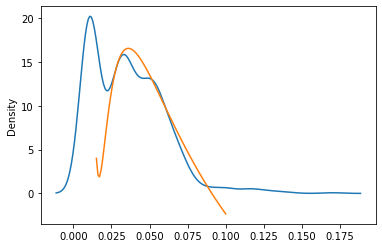

In [592]:



example_data = return1
#example_data = (example_data- example_data.mean())/example_data.std()
data_temp2 = example_data.values.reshape(-1)
data_temp2 = data_temp2[~np.isnan(data_temp2)]
condition = (data_temp2>0) & (np.abs(data_temp2)<0.2)
data_temp2 = data_temp2[condition]
#sns.kdeplot(data_temp2)
hist = np.histogram(data_temp2,bins=np.linspace(0,0.1,NUM_BINS),density=True)
#plt.plot(hist[0])
sns.kdeplot(data_temp2)
x = hist[1][15:]
ss = np.polyfit(x**-1,hist[0][14:],3)
print(ss)
st = np.vstack([x**-3,x**-2,x**-1,np.ones(len(x))])
plt.plot(x,np.einsum('i,ij->j',ss,st))

In [676]:
CONSTANT_1 = 1
CONSTANT_2 = 1
CONSTANT_3 = 1
sigma = 2
start_close = data_temp_close[50]
price = start_close
result_seq = np.zeros(1750)
for date in range(1800-50):
    if date<= 3:
        price = data_temp_close[date+50]
    else:
        returns1 = result_seq[date-3] - result_seq[date-4]
        returns2 = result_seq[date-2] - result_seq[date-3]
        returns3 = result_seq[date-1] - result_seq[date-2]

        act1 = returns3
        if act1>0:
            agent1 = 1
        elif act1 < 0:
            agent1 = -1
        else:
            agent1 = 0
            
        act2 = (returns3 + returns2)/2
        if act2>0:
            agent2 = 1
        elif act2 < 0:
            agent2 = -1
        else:
            agent2 = 0        
    
        act3 = (returns3 + returns2 + returns1)/3
        if act3>0:
            agent3 = 1
        elif act3 < 0:
            agent3 = -1
        else:
            agent3 = 0 
        print(returns1,returns2,returns3,agent1,agent2,agent3)            
        price = price + CONSTANT_1*(agent1+np.random.normal(0,sigma)) + \
        CONSTANT_2*(agent2 + np.random.normal(0,sigma)) + CONSTANT_3*(agent3 + np.random.normal(0,sigma))
    result_seq[date] = price

0.5300000000000011 -1.0900000000000034 0.14000000000000057 1 -1 -1
-1.0900000000000034 0.14000000000000057 2.716688109186258 1 1 1
0.14000000000000057 2.716688109186258 -0.5642330177678332 -1 1 1
2.716688109186258 -0.5642330177678332 -4.8547779659226045 -1 -1 -1
-0.5642330177678332 -4.8547779659226045 1.0514104979208483 1 -1 -1
-4.8547779659226045 1.0514104979208483 3.8675329775414546 1 1 1
1.0514104979208483 3.8675329775414546 0.21419299174218764 1 1 1
3.8675329775414546 0.21419299174218764 2.2141778630955784 1 1 1
0.21419299174218764 2.2141778630955784 0.1488381356260149 1 1 1
2.2141778630955784 0.1488381356260149 -0.7048603768792105 -1 -1 1
0.1488381356260149 -0.7048603768792105 -2.0564295773429535 -1 -1 -1
-0.7048603768792105 -2.0564295773429535 -0.7734217763610474 -1 -1 -1
-2.0564295773429535 -0.7734217763610474 -2.9378733070821 -1 -1 -1
-0.7734217763610474 -2.9378733070821 0.5873902440794794 1 -1 -1
-2.9378733070821 0.5873902440794794 1.8186675523079785 1 1 -1
0.5873902440794794 

3.2577784444867603 5.322037328519315 3.3517308470140392 1 1 1
5.322037328519315 3.3517308470140392 -0.21867312836212704 -1 1 1
3.3517308470140392 -0.21867312836212704 1.720498119078016 1 1 1
-0.21867312836212704 1.720498119078016 7.004680886449648 1 1 1
1.720498119078016 7.004680886449648 6.691203249002854 1 1 1
7.004680886449648 6.691203249002854 3.673856974958497 1 1 1
6.691203249002854 3.673856974958497 2.4172466023747603 1 1 1
3.673856974958497 2.4172466023747603 3.9389096744011027 1 1 1
2.4172466023747603 3.9389096744011027 3.2135853314399867 1 1 1
3.9389096744011027 3.2135853314399867 3.1201047536072792 1 1 1
3.2135853314399867 3.1201047536072792 14.00730841313829 1 1 1
3.1201047536072792 14.00730841313829 1.777798680582677 1 1 1
14.00730841313829 1.777798680582677 6.402061065992598 1 1 1
1.777798680582677 6.402061065992598 -6.760060374037792 -1 -1 1
6.402061065992598 -6.760060374037792 4.0168714636876075 1 -1 1
-6.760060374037792 4.0168714636876075 -0.08366627731921028 -1 1 -1
4

0.6367607866211955 2.2366570417378284 4.088897271373568 1 1 1
2.2366570417378284 4.088897271373568 8.98112615714679 1 1 1
4.088897271373568 8.98112615714679 8.741579432555994 1 1 1
8.98112615714679 8.741579432555994 6.749987431618436 1 1 1
8.741579432555994 6.749987431618436 7.461999187502727 1 1 1
6.749987431618436 7.461999187502727 5.478254471283947 1 1 1
7.461999187502727 5.478254471283947 6.278975980496355 1 1 1
5.478254471283947 6.278975980496355 -1.7771094502307534 -1 1 1
6.278975980496355 -1.7771094502307534 2.37362428379177 1 1 1
-1.7771094502307534 2.37362428379177 0.9720639990986797 1 1 1
2.37362428379177 0.9720639990986797 4.977573547103681 1 1 1
0.9720639990986797 4.977573547103681 4.506194934986873 1 1 1
4.977573547103681 4.506194934986873 -0.6469284776114606 -1 1 1
4.506194934986873 -0.6469284776114606 -0.7232141907580072 -1 -1 1
-0.6469284776114606 -0.7232141907580072 -4.840358771957256 -1 -1 -1
-0.7232141907580072 -4.840358771957256 1.2513490316089033 1 -1 -1
-4.8403587

0.18174005960531758 -7.36023248189602 -6.642332498637444 -1 -1 -1
-7.36023248189602 -6.642332498637444 -3.289747243970311 -1 -1 -1
-6.642332498637444 -3.289747243970311 -2.2440997106306497 -1 -1 -1
-3.289747243970311 -2.2440997106306497 0.23810605157191844 1 -1 -1
-2.2440997106306497 0.23810605157191844 -5.64289012571129 -1 -1 -1
0.23810605157191844 -5.64289012571129 -3.1552573839016986 -1 -1 -1
-5.64289012571129 -3.1552573839016986 -5.494985477301995 -1 -1 -1
-3.1552573839016986 -5.494985477301995 -6.6381359769682575 -1 -1 -1
-5.494985477301995 -6.6381359769682575 -3.289448967036961 -1 -1 -1
-6.6381359769682575 -3.289448967036961 -1.9287504688678325 -1 -1 -1
-3.289448967036961 -1.9287504688678325 -3.200890037639411 -1 -1 -1
-1.9287504688678325 -3.200890037639411 -3.142212009025826 -1 -1 -1
-3.200890037639411 -3.142212009025826 -2.948562626350025 -1 -1 -1
-3.142212009025826 -2.948562626350025 1.2880371558348571 1 -1 -1
-2.948562626350025 1.2880371558348571 -2.101827134162619 -1 -1 -1
1

-7.118499977917054 1.5035129530846234 -2.0360024876876537 -1 -1 -1
1.5035129530846234 -2.0360024876876537 -3.3699298890738305 -1 -1 -1
-2.0360024876876537 -3.3699298890738305 -1.776659639863567 -1 -1 -1
-3.3699298890738305 -1.776659639863567 -0.6249148809298504 -1 -1 -1
-1.776659639863567 -0.6249148809298504 0.89020841010921 1 1 -1
-0.6249148809298504 0.89020841010921 -0.36018964081171134 -1 1 -1
0.89020841010921 -0.36018964081171134 -4.776268599147443 -1 -1 -1
-0.36018964081171134 -4.776268599147443 -4.286263562273234 -1 -1 -1
-4.776268599147443 -4.286263562273234 -3.743281990543096 -1 -1 -1
-4.286263562273234 -3.743281990543096 -0.2113484991746759 -1 -1 -1
-3.743281990543096 -0.2113484991746759 -4.636890369587832 -1 -1 -1
-0.2113484991746759 -4.636890369587832 -0.7144925311271777 -1 -1 -1
-4.636890369587832 -0.7144925311271777 -0.3087197056792661 -1 -1 -1
-0.7144925311271777 -0.3087197056792661 -6.645749113113084 -1 -1 -1
-0.3087197056792661 -6.645749113113084 2.7071067972412948 1 -1

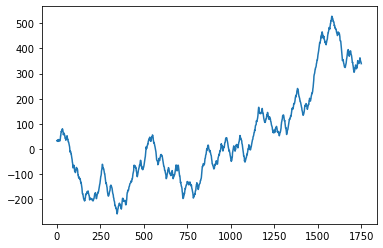

In [677]:
plt.plot(result_seq)

In [678]:
resuotl_seq = pd.Series(result_seq,index = data_temp_close.index[50:1800])
close1 = resuotl_seq.fillna(method = 'ffill').fillna(method = 'bfill')
return1 = (close1-close1.shift(1))/close1.shift(1)
return1 = return1.fillna(method = 'ffill').fillna(method = 'bfill')

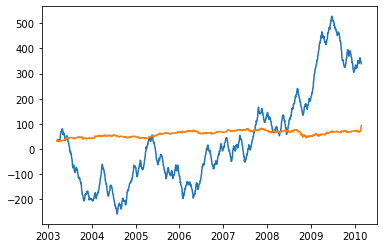

In [679]:
plt.plot(resuotl_seq)
plt.plot(data_temp_close[50:1800])

In [ ]:
example_data = return1
example_data = (example_data- example_data.mean())/example_data.std()
data_temp2 = example_data.values.reshape(-1)
data_temp2 = data_temp2[~np.isnan(data_temp2)]
condition = (data_temp2>0) & (np.abs(data_temp2)<5)
data_temp2 = data_temp2[condition]
#sns.kdeplot(data_temp2)
hist = np.histogram(data_temp2,bins=np.linspace(0,4,NUM_BINS),density=True)
#plt.plot(hist[0])
sns.kdeplot(data_temp2)
x = hist[1][3:]
ss = np.polyfit(x**-1,hist[0][2:],4)
print(ss)
st = np.vstack([x**-4,x**-3,x**-2,x**-1,np.ones(len(x))])
plt.plot(x,np.einsum('i,ij->j',ss,st))

In [ ]:


example_data = return1
#example_data = (example_data- example_data.mean())/example_data.std()
data_temp2 = example_data.values.reshape(-1)
data_temp2 = data_temp2[~np.isnan(data_temp2)]
condition = (data_temp2>0) & (np.abs(data_temp2)<0.2)
data_temp2 = data_temp2[condition]
#sns.kdeplot(data_temp2)
hist = np.histogram(data_temp2,bins=np.linspace(0,0.1,NUM_BINS),density=True)
#plt.plot(hist[0])
sns.kdeplot(data_temp2)
x = hist[1][11:]
ss = np.polyfit(x**-1,hist[0][10:],4)
print(ss)
st = np.vstack([x**-4,x**-3,x**-2,x**-1,np.ones(len(x))])
plt.plot(x,np.einsum('i,ij->j',ss,st))

In [1]:
import pandas as pd

In [3]:
    pd.read_csv('/Users/manifect/Desktop/windnews/FinancialNews_20130115.csv')

,Unnamed: 0,OBJECT_ID,PUBLISHDATE,TITLE,CONTENT,SOURCE,URL,SECTIONS,AREACODES,WINDCODES,INDUSTRYCODES,SECTERCODES,KEYWORDS,OPDATE,OPMODE,MKTSENTIMENTS
0,0,176807821,2013-01-15 04:01:22,54城市新房成交开门红新年前2周同比大涨103%,数据显示，18个主要城市平均库存消化周期由去年年初的18个月降低为去年年末的9个月，时间...,证券日报,http://zqrb.ccstock.cn/html/2013-01/15/content...,标准新闻|宏观|产经|旧版新闻|国内财经|中国经济|精选新闻,DQXW:地区新闻|DQXW01:大中华区|DQ0001:中国（临时）,NaN,6240000000:金融|6240400000:房地产|6240401000:房地产管理与...,NaN,补充新闻|楼市调控,2016-01-14 22:24:26,0,NaN
1,1,176807828,2013-01-15 04:01:22,航天军工掀起涨停潮逾4亿大单疯抢20股,■本报记者赵子强<br/><br/> 由于涉海领土主权争端的关注度越来越高，高层对航天...,证券日报,http://zqrb.ccstock.cn/html/2013-01/15/content...,标准新闻|股市|产经|旧版新闻|国内财经|板块|精选新闻,DQXW:地区新闻|DQXW01:大中华区|DQ0001:中国（临时）,NaN,6220000000:工业|6220100000:资本货物|6220101000:航天航空与...,NaN,补充新闻,2016-01-14 22:24:25,0,NaN
2,2,176807842,2013-01-15 04:01:29,消息称戴尔正与多家PE展开私有化谈判,<br/><br/> 新浪科技讯 北京时间1月15日凌晨消息，据彭博社周一报道，戴尔正...,新浪,http://tech.sina.com.cn/it/2013-01-15/03347978...,精选新闻,NaN,NaN,6245202010:电脑硬件,NaN,补充新闻,2016-01-14 22:24:25,0,NaN
3,3,176807954,2013-01-15 04:02:55,银监会：银行理财产品将按两类收益分账经营,《上海证券报》报道，银监会主席尚福林在1月14日召开的2013年度工作会上强调，要...,Wind资讯,http://snap.windin.com/ns/findsnap.php?id=1768...,标准新闻|产经|股市|宏观|理财|旧版新闻|国内财经|中国经济|大盘|银行业|精选新闻|银行...,DQXW:地区新闻|DQXW01:大中华区|DQ0001:中国（临时）,NaN,6240000000:金融|6240100000:银行|6240101000:商业银行|62...,NaN,ON0609|宏观政策风向|高层言论|ON0611|突发新闻|Wind金融屏,2016-01-14 22:24:25,0,NaN
4,4,176807629,2013-01-15 04:05:37,分析称2013年楼价高位运转可能性有限仍将稳字当头,《第一财经日报》报道，2013年伊始，多地楼市仍延续增量走势，回暖趋势进一步明朗。...,Wind资讯,http://snap.windin.com/ns/findsnap.php?id=1768...,标准新闻|宏观|产经|旧版新闻|国内财经|中国经济|精选新闻|今日要闻,DQXW:地区新闻|DQXW01:大中华区|DQ0001:中国（临时）,NaN,6240000000:金融|6240400000:房地产|6240401000:房地产管理与...,NaN,ON0609|楼市调控,2016-01-14 22:24:25,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2281,2281,176910607,2013-01-15 18:34:40,德国去年新债占GDP比例为0.32%提前四年达标,外电报道，德国财政部一名消息人士1月15日(周二)表示，德国2012年结构性新债务...,Wind资讯,http://snap.windin.com/ns/findsnap.php?id=1769...,标准新闻|宏观|股市|旧版新闻|国际财经|全球股市|精选新闻|全球经济|今日要闻,DQXW:地区新闻|DQXW07:海外|DQXW03:欧洲|DQ0014:德国,NaN,NaN,NaN,ON0609|欧债危机,2016-01-14 22:22:17,0,NaN
2282,2282,176911957,2013-01-15 18:30:34,平高电气：2012年净利润同比增677.97%（快报）,Wind资讯报道，平高电气1月15日晚间发布业绩快报称，2012年归...,Wind资讯,http://snap.windin.com/ns/findsnap.php?id=1769...,标准新闻|个股|旧版新闻|个股|精选新闻,DQXW:地区新闻|DQXW01:大中华区|DQ0001:中国（临时）,NaN,6220104010:电气部件与设备,NaN,2011年报|ON0608|净利润|利润|收入|收益,2016-01-14 22:22:17,0,NaN
2283,2283,176911960,2013-01-15 18:30:39,ST皇台：法院受理公司3390万元借款纠纷案,Wind资讯报道，ST皇台1月15日晚间发布公告称，2013年1月14日，公司收到...,Wind资讯,http://snap.windin.com/ns/findsnap.php?id=1769...,标准新闻|个股|旧版新闻|个股|精选新闻,DQXW:地区新闻|DQXW01:大中华区|DQ0001:中国（临时）,NaN,6230201020:白酒与葡萄酒,NaN,NaN,2016-01-14 22:22:17,0,NaN
2284,2284,176912139,2013-01-15 18:32:46,深圳2013年首宗宅地14.1亿成功出让,深圳2013年首宗宅地14.1亿成功出让来源：观点地产网作者：非言2013年01月15日18...,搜狐,http://nj.focus.cn/news/2013-01-15/2760405.html,精选新闻,NaN,NaN,6240401020:房地产开发,NaN,补充新闻,2016-01-14 22:22:17,0,NaN


In [4]:
pd.read_pickle('/Users/manifect/Desktop/all_news_result')

,新闻编码,发布时间,TIMESTAMP,录入日期,录入时间,COMPNAME,compcode,新闻标题,新闻来源,财汇新闻链接,指标编码,指标分类,重要性
发布日期,,,,,,,,,,,,,
2019-01-01,20190101020109634297,1/1/2019 12:37:17,AAAAAKzZV4s=,1/1/2019 00:00:00,13:01:12,江苏苏宁银行股份有限公司,80606876,还原丰盛集团生死三日：政府协调城投平台代还逾期借款,上海信托圈,https://fcnews.finchina.com/newsview/default.a...,513123.0,513.0,0.0
2019-01-01,20190101020109634129,1/1/2019 10:03:00,AAAAAKzZHYI=,1/1/2019 00:00:00,11:21:09,烟台市福山区国有资产经营公司,80479896,“跨国公司华人总裁”的蹊跷生意经,界面新闻,https://fcnews.finchina.com/newsview/default.a...,513123.0,513.0,-1.0
2019-01-01,20190102020117114475,1/1/2019 15:27:00,AAAAAKzimXk=,2/1/2019 00:00:00,10:31:42,岁宝百货控股(中国)有限公司,80149811,岁宝百货复牌2天暴跌近6成 郝建民加盟曾让股价翻倍,红商网,https://fcnews.finchina.com/newsview/default.a...,511103.0,511.0,-2.0
2019-01-01,20190101020109633577,1/1/2019 06:00:43,AAAAAKzYy+E=,1/1/2019 00:00:00,07:31:03,淡水泉(北京)投资管理有限公司,80129660,去年私募行业遭遇寒冬 清盘基金产品创历史纪录,中国新闻网,https://fcnews.finchina.com/newsview/default.a...,513128.0,513.0,-1.0
2019-01-01,20190101020109634297,1/1/2019 12:37:17,AAAAAKzZV3U=,1/1/2019 00:00:00,13:01:12,中国民生银行股份有限公司,10000013,还原丰盛集团生死三日：政府协调城投平台代还逾期借款,上海信托圈,https://fcnews.finchina.com/newsview/default.a...,513123.0,513.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,20211231020216559227,31/12/2021 08:00:00,AAAAATmW+i0=,31/12/2021 00:00:00,08:15:27,漳州片仔癀药业股份有限公司,10001278,精分的中药,诗与星空,https://fcnews.finchina.com/newsview/default.a...,NaN,NaN,NaN
2021-12-31,20211231020216559227,31/12/2021 08:00:00,AAAAATmW+kQ=,31/12/2021 00:00:00,08:15:27,厦门宏仁医药有限公司,80513541,精分的中药,诗与星空,https://fcnews.finchina.com/newsview/default.a...,NaN,NaN,NaN
2021-12-31,20211231020216560280,31/12/2021 07:09:00,AAAAATmXAe4=,31/12/2021 00:00:00,08:18:51,美国伯克希尔哈撒韦公司,80101767,巴菲特回复美参议员桑德斯，拒绝介入子公司劳资纠纷,新浪财经,https://fcnews.finchina.com/newsview/default.a...,NaN,NaN,NaN
